In [1]:
%pwd
%cd ../..

/home/rydevera3/data-science/umn_research/Deeplifting


In [2]:
import glob

import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME

In [12]:
# Get the results from deeplifting
files = glob.glob('./results/results-2023-08-03-2*')
deeplifting_results = pd.read_parquet(files)

# Select specific columns for results
deeplifting_results = (
    deeplifting_results[['problem_name', 'algorithm', 'x1', 'x2', 'f', 'total_time', 'global_minimum']]
)

# For now let's remove sine-envelope function because there is something
# going on there
mask = deeplifting_results['problem_name'] != 'sine_envelope'
deeplifting_results = deeplifting_results.loc[mask].reset_index(drop=True)
deeplifting_results['hits'] = np.abs(
    deeplifting_results['global_minimum'] - deeplifting_results['f']
) <= 1e-4
deeplifting_results['hits'] = deeplifting_results['hits'].astype(int)
deeplifting_results = deeplifting_results.rename(columns={'total_time': 'time'})
deeplifting_results = deeplifting_results.drop(columns=['global_minimum'])
deeplifting_results.head()

,problem_name,algorithm,x1,x2,f,time,hits
0,kriging_peaks_red010,Deeplifting,-2.169612,0.295735,0.291121,440.880969,1
1,kriging_peaks_red010,Deeplifting,-2.169612,0.295735,0.291121,3123.716541,1
2,kriging_peaks_red010,Deeplifting,-2.169612,0.295735,0.291121,112.328760,1
3,kriging_peaks_red010,Deeplifting,-2.169612,0.295735,0.291121,254.529593,1
4,kriging_peaks_red010,Deeplifting,-2.169612,0.295735,0.291121,2216.122304,1


In [13]:
deeplifting_results.groupby('problem_name')['hits'].mean()

problem_name
ackley                  1.00
bukin_n6                0.35
cross_in_tray           1.00
cross_leg_table         0.65
drop_wave               1.00
eggholder               0.45
ex8_1_1                 1.00
griewank                0.95
holder_table            0.60
kriging_peaks_red010    0.80
kriging_peaks_red020    0.95
levy                    1.00
levy_n13                1.00
mathopt6                0.50
quantum                 0.85
rastrigin               1.00
rosenbrock              1.00
schaffer_n2             1.00
schaffer_n4             0.95
schwefel                0.80
shubert                 0.80
Name: hits, dtype: float64

In [21]:
# Load in the comparisons
comparison_files = glob.glob('./results/algorithm-comparisons-*.parquet')
comparison_results = pd.read_parquet(comparison_files)

# # Omit sine envelope function
# mask = comparison_results['problem_name'] != 'sine_envelope'
# comparison_results = comparison_results.loc[mask].reset_index(drop=True)
problems = [
    'ackley',
    'ackley2',
    'adjiman',
    'alpine1',
    'alpine2',
    'bartels_conn',
    'beale',
    'bird',
    'bohachevsky3',
    'booth',
    'bukin_n4',
    'bukin_n6',
    'camel_3hump',
    'camel_6hump',
    'chung_reynolds',
    'cube',
    'cross_in_tray',
    'cross_leg_table',
    'drop_wave',
    'eggholder',
    'griewank',
    'holder_table',
    'levy',
    'levy_n13',
    'rastrigin',
    'schaffer_n2',
    'schaffer_n4',
    'schwefel',
    'shubert',
    'ex8_1_1',
    'kriging_peaks_red010',
    'mathopt6',
    'quantum',
    'rosenbrock',
]

comparison_results = comparison_results.loc[comparison_results['problem_name'].isin(problems)]

In [22]:
comparison_results['problem_name'].value_counts()

problem_name
levy                    80
griewank                80
schaffer_n4             80
mathopt6                80
eggholder               80
bukin_n6                80
cube                    80
ex8_1_1                 80
holder_table            80
shubert                 80
schwefel                80
adjiman                 80
cross_in_tray           80
bukin_n4                80
drop_wave               80
alpine1                 80
camel_6hump             80
bartels_conn            80
alpine2                 80
bird                    80
schaffer_n2             80
quantum                 80
rosenbrock              80
ackley                  80
kriging_peaks_red010    80
beale                   80
camel_3hump             80
cross_leg_table         80
bohachevsky3            80
chung_reynolds          80
rastrigin               80
booth                   80
levy_n13                80
ackley2                 80
Name: count, dtype: int64

In [23]:
results_df = comparison_results.copy()

In [24]:
results_df.loc[results_df['problem_name'] == 'ackley3']

,x1,x2,f,algorithm,time,problem_name,hits


In [25]:
aggregated_results_df = (
    results_df
    .groupby(['problem_name', 'algorithm'])
    .agg({'hits': 'mean'})
    .rename(columns={'hits': 'Success Rate'})
    .unstack()
    .transpose()
    .reorder_levels(['algorithm', None])
    .transpose()
)

In [26]:
aggregated_results_df.mean().sort_values(ascending=False)

algorithm                           
Dual Annealing          Success Rate    0.885294
Differential Evolution  Success Rate    0.830882
IPOPT                   Success Rate    0.444118
PyGRANSO                Success Rate    0.417647
dtype: float64

In [20]:
aggregated_results_df

algorithm,Differential Evolution,Dual Annealing,IPOPT,PyGRANSO
,Success Rate,Success Rate,Success Rate,Success Rate
problem_name,,,,
ackley,1.00,1.00,0.05,0.00
ackley2,0.90,1.00,1.00,0.05
adjiman,1.00,1.00,0.95,0.85
alpine1,1.00,1.00,0.95,0.75
alpine2,1.00,1.00,0.40,0.30
bartels_conn,0.60,1.00,0.70,0.95
beale,0.85,1.00,0.70,0.55
bird,0.70,1.00,0.50,0.40


In [ ]:
aggregated_results_df.shape

In [5]:
file = [
    './results/results-2023-08-2-layer-512-holder_table-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-512-mathopt6-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-schwefel-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-shubert-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-512-cross_leg_table-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-ackley2-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-booth-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-adjiman-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-bukin_n4-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-camel_3hump-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-alpine1-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-camel_6hump-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-chung_reynolds-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-cube-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-alpine2-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-bartels_conn-0-particle-leaky_relu.parquet',
    './results/results-2023-08-2-layer-128-sum-beale-0-particle-leaky_relu.parquet'
]
df = pd.read_parquet(file)

In [6]:
df

,x1,x2,f,algorithm,total_time,input_size,hidden_size,hidden_activation,output_activation,agg_function,problem_name,global_minimum
0,-8.055023,-9.66459,-1.920850e+01,Deeplifting,288.669189,512,512-512,sine,leaky_relu,sum,holder_table,-19.2085
1,-8.055023,-9.66459,-1.920850e+01,Deeplifting,293.068626,512,512-512,sine,leaky_relu,sum,holder_table,-19.2085
2,-8.055023,-9.66459,-1.920850e+01,Deeplifting,292.494679,512,512-512,sine,leaky_relu,sum,holder_table,-19.2085
3,-8.055023,-9.66459,-1.920850e+01,Deeplifting,106.990948,512,512-512,sine,leaky_relu,sum,holder_table,-19.2085
4,-8.055023,-9.66459,-1.920850e+01,Deeplifting,622.970906,512,512-512,sine,leaky_relu,sum,holder_table,-19.2085
...,...,...,...,...,...,...,...,...,...,...,...,...
316,3.000000,0.50000,1.636838e-17,Deeplifting,14.031731,512,128-128,sine,leaky_relu,sum,beale,0.0000
317,3.000000,0.50000,1.687086e-21,Deeplifting,17.486477,512,128-128,sine,leaky_relu,sum,beale,0.0000
318,3.000000,0.50000,4.362407e-19,Deeplifting,140.694729,512,128-128,sine,leaky_relu,sum,beale,0.0000
319,3.000000,0.50000,2.316557e-17,Deeplifting,12.372313,512,128-128,sine,leaky_relu,sum,beale,0.0000


In [7]:
df['hits'] = np.abs(df['global_minimum'] - df['f']) <= 1e-4

In [8]:
df.groupby('problem_name')['hits'].agg(['mean', 'count'])

,mean,count
problem_name,,
ackley2,1.00,20
adjiman,1.00,20
alpine1,1.00,20
alpine2,1.00,20
bartels_conn,1.00,20
beale,1.00,20
booth,1.00,20
bukin_n4,1.00,20
camel_3hump,1.00,20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def xinsheyang02(x, y):
    numerator = np.abs(x) + np.abs(y)
    demoninator = np.exp(np.sin(x ** 2) + np.sin(y ** 2))
    return numerator / demoninator

x = np.linspace(-2 * np.pi, 2 * np.pi, 10000)
y = np.linspace(-2 * np.pi, 2 * np.pi, 10000)
X, Y = np.meshgrid(x, y)
Z = xinsheyang02(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of Ackley Function')

plt.show()

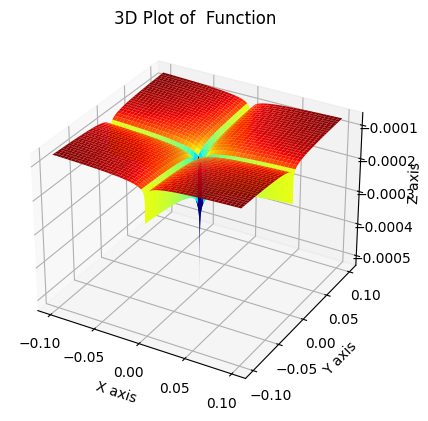

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def crosslegtable(x, y):
    component1 = np.sin(x) * np.sin(y)
    component2 = np.exp(np.abs(100 - (np.sqrt(x ** 2 + y ** 2)) / np.pi))
    denominator = np.abs(component1 * component2) + 1
    return  -1 / (denominator) ** 0.1

x = np.linspace(-0.1, 0.1, 20000)
y = np.linspace(-0.1, 0.1, 20000)
X, Y = np.meshgrid(x, y)
Z = crosslegtable(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of  Function')

plt.show()

In [ ]:
crosslegtable(0, 0)

In [ ]:
problem = PROBLEMS_BY_NAME['damavandi']

In [ ]:
problem

In [ ]:
import numpy as np
import torch

In [ ]:
results = np.zeros((1, 1, 3))
trial = 0
f = problem['objective']

In [ ]:
values = [1, 10]
f(torch.tensor(values), results=results, trial=trial, version='pytorch')

In [ ]:
f(np.array(values), results=results, trial=trial, version='numpy')

In [ ]:
x = [0, 1, 2, 3, 4]

In [ ]:
x[slice(0, 2)]

In [ ]:
x1, x2 = 0, 2

r = x1 ** 2 + x2 ** 2
theta = np.arctan(x2 / x1)
component1 = (r - 10) / (5 ** 0.5 * np.cos(theta))

In [ ]:
(r, theta, component1)

In [ ]:
(1 - np.abs(component1) ** 5) * (2 + component1)

In [ ]:
np.sqrt(5)

In [ ]:
5 ** 0.5

In [ ]:
x1, x2 = 0, 0
numerator = np.abs(x1) + np.abs(x2)
demoninator = np.exp(np.sin(x1 ** 2) + np.sin())